### 군집분석

In [25]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt, Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [26]:
#okt = Okt()
han = Hannanum()
df = pd.read_csv('clustering.csv')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [28]:
doc = [] # 기사내용에서 명사만 추출하기

for i in df['기사내용']:
  doc.append(han.nouns(i))

for i in range(len(doc)):
  doc[i] = ' '.join(doc[i]) # 띄어쓰기 포함

doc[0]

'유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성'

In [29]:
# TDM 만들기
cv = CountVectorizer()
X = cv.fit_transform(doc)

In [30]:
cv.get_feature_names()

['10대',
 '10배',
 '10분',
 '12억500',
 '12억500만달러',
 '12억5500',
 '12억5500만달러',
 '12억5천500',
 '15명',
 '16',
 '1군',
 '1급',
 '1라운드',
 '1박2일간',
 '1시간',
 '1조3416억원',
 '1조3500억원',
 '1조4000억원',
 '1천원',
 '2005년',
 '2007년',
 '2015년',
 '20대',
 '218bq',
 '218베크렐',
 '22만8000원',
 '23만1000원',
 '29',
 '2라운드',
 '2라운드에서',
 '2번',
 '2연승',
 '2일',
 '2주',
 '3개',
 '3년',
 '3라운드에서',
 '3분',
 '3세대',
 '47명',
 '4시',
 '4인',
 '4일',
 '50',
 '5000',
 '5000만',
 '5000만달러',
 '50대',
 '50분',
 '520',
 '520베크렐',
 '560억원',
 '5만2500원',
 '5만3000원',
 '5분',
 '5일',
 '5천',
 '60표',
 '69표',
 '78',
 '88대',
 '8개',
 '8배',
 '8월',
 '91',
 '9시',
 '9시9분',
 'away',
 'beautiful',
 'bq',
 'break',
 'egfr',
 'iarc',
 'janssen',
 'rain',
 'us',
 'yh25448',
 '가격제한폭',
 '가능성',
 '가동',
 '가면',
 '가수',
 '가수들',
 '가스',
 '가왕',
 '가왕답게',
 '가왕방어전',
 '가왕전',
 '가요계',
 '가운데',
 '가정',
 '가정용',
 '가창력',
 '각각',
 '각시탈',
 '각자',
 '각종',
 '갈증',
 '감미',
 '감미로운',
 '감사하다',
 '감성',
 '감회',
 '강세',
 '강조',
 '개발',
 '개장',
 '거래',
 '거래일',
 '거론',
 '거짓말',
 '건빵선생',
 '검사',
 '검사결과',
 '검출',
 '게시물

In [31]:
df_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df_cv

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,1군,1급,1라운드,1박2일간,1시간,1조3416억원,1조3500억원,1조4000억원,1천원,2005년,2007년,2015년,20대,218bq,218베크렐,22만8000원,23만1000원,29,2라운드,2라운드에서,2번,2연승,2일,2주,3개,3년,3라운드에서,3분,3세대,47명,...,포스터,포장해,포털사이트,폭발적,표적,프로그램,프로젝트명,피해,피해자,하나,하나금융투,하이젠,학회,한국,한국원자력안전기술원,한국제,한미약품,한편,한표,한화,항암,해당,해명,해소,행복,허가,허스키,헤이즈,현재,현황,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
kmeans = KMeans(n_clusters=3).fit(df_cv)
kmeans.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
len(cv.get_feature_names()) # 차원이 504개

581

In [34]:
# 차원 축소하기(PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [35]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_cv)

In [36]:
PC_df = pd.DataFrame(data =PC, columns = ['pc1', 'pc2'])
PC_df.index = df['검색어']

In [37]:
PC_df

,pc1,pc2
검색어,,
유한양행,-2.245404,-4.167431
유한양행,-3.613960,-9.898638
유한양행,-2.932635,-7.159356
유한양행,-2.142769,-3.757081
유한양행,-3.397873,-8.904241
라돈,-3.456165,0.931146
라돈,-4.172641,2.527020
라돈,-6.418890,7.240871
라돈,-7.928541,10.011237


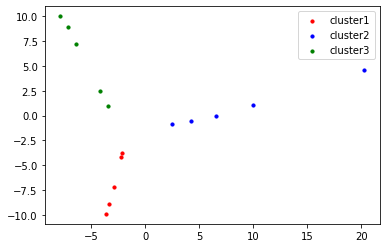

In [38]:
# x축 : first y축 : second 번호로 나타낸 후 plot으로 시각화
plt.scatter(PC_df.iloc[kmeans.labels_ == 0, 0], PC_df.iloc[kmeans.labels_ == 0, 1],
            s = 10, c = 'red', label = 'cluster1')

plt.scatter(PC_df.iloc[kmeans.labels_ == 1, 0], PC_df.iloc[kmeans.labels_ == 1, 1],
            s = 10, c = 'blue', label = 'cluster2')

plt.scatter(PC_df.iloc[kmeans.labels_ == 2, 0], PC_df.iloc[kmeans.labels_ == 2, 1],
            s = 10, c = 'green', label = 'cluster3')

plt.legend()
plt.show()

### 계층 분할

In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [40]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df_cv)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

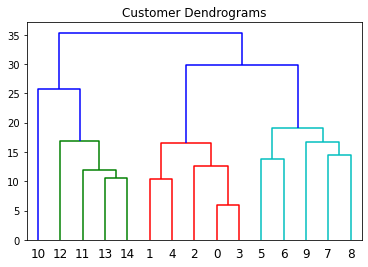

In [41]:
plt.figure()
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(df_cv, method='ward'))

In [42]:
print(doc[5])

침대 매트리스 이 온수매트 라돈 검출 소식 가정 곳곳 라돈 검출 우려 불식 이 라돈측정기 사용 주민 대구 경우 대구시 8월 가정용 라돈측정기 대 대여료 1천원 대구시 당시 가정용 라돈측정기 50대 구입 8개 구청 군청 신분증 지참 신청서 작성 사용료 1천원 선납한 뒤 1박2일간 수 라돈 측정기 벽·천장·바닥 등 50㎝ 이상 사용 출입문 창 전자제품 곳 측정기 뒤 방문 창문 공간 밀폐 다음 측정기 전원 가동 10분 단위 자동 측정 1시간 이상 가동 정확 측정값 수


In [43]:
print(doc[11])

복면가왕' 출연 왕밤빵 얼굴 공개 축음기 천단비 관심 4일 방송 예능프로그램 '복면가왕'에서 왕밤빵 축음기 88대 가왕 자리 대결 결과 왕밤빵 가왕 이날 축음기 박정현 미아 가창력 자랑 왕밤빵 이 축음기 가면 정체 가수 천단비 천단비 방송이 후 자신 인스타그램 제 무대 소중 순간 소중 행복 순간 하나 '복면가왕' 출연 소감 천단비 2015년 '슈퍼스타K7' 출연 주목 데뷔 2005년 '건빵선생 별사탕' 눈물샘 데뷔 바 '슈스케7' 준우승 후 각종 참여 노래 천단비 지난해 봄 거짓말 발매 들 사랑
